In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [4]:
df['nameDest'].nunique()

2722362

In [5]:

database = pd.DataFrame(df)
def find_starting_letter(column):
    return column.str[0]
df['Starting_Letter'] = find_starting_letter(df['nameDest'])
#initial balance recipient before the transaction. Note that there is not information for customers that start with M

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Starting_Letter
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C


In [7]:
df.loc[df['oldbalanceDest']>200000]  

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Starting_Letter
41,1,DEBIT,5758.59,C1466917878,32604.00,26845.41,C1297685781,209699.00,16997.22,0,0,C
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0,C
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0,C
64,1,DEBIT,4874.49,C811207775,153.00,0.00,C1971489295,253104.00,0.00,0,0,C
71,1,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.00,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
6362599,742,CASH_OUT,4009058.39,C1970706589,4009058.39,0.00,C637394241,1229761.96,5238820.34,1,0,C
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,1,0,C
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,C
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0,C


In [8]:
database = pd.DataFrame(df)
mask = df['Starting_Letter'].str.startswith('M')
df = df[~mask]
df.reset_index(drop=True, inplace=True)
#initial balance recipient before the transaction. Note that there is not information for customers that start with M
#that's why we can removing the indexes where customers in nameorig Starting Letter is M

In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Starting_Letter
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C
2,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,C
3,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0,C
4,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
4211120,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C
4211121,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C
4211122,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C
4211123,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C


In [12]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Starting_Letter
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C
2,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,C
3,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0,C
4,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
4211120,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C
4211121,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C
4211122,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C
4211123,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C


In [13]:
df.loc[df['Starting_Letter']=='M']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Starting_Letter


In [14]:
df['isFlaggedFraud'].value_counts()

0    4211109
1         16
Name: isFlaggedFraud, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211125 entries, 0 to 4211124
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             object 
 2   amount           float64
 3   nameOrig         object 
 4   oldbalanceOrg    float64
 5   newbalanceOrig   float64
 6   nameDest         object 
 7   oldbalanceDest   float64
 8   newbalanceDest   float64
 9   isFraud          int64  
 10  isFlaggedFraud   int64  
 11  Starting_Letter  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 385.5+ MB


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,4.211125e+06,4.211125e+06,4.211125e+06,4.211125e+06,4.211125e+06,4.211125e+06,4.211125e+06,4.211125e+06
mean,2.428961e+02,2.650835e+05,1.225068e+06,1.260404e+06,1.663058e+06,1.850856e+06,1.950310e-03,3.799460e-06
std,1.421435e+02,7.275891e+05,3.482978e+06,3.523174e+06,4.064780e+06,4.386080e+06,4.411924e-02,1.949217e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,7.608556e+04,0.000000e+00,0.000000e+00,1.396590e+05,2.217176e+05,0.000000e+00,0.000000e+00
50%,2.370000e+02,1.589432e+05,1.815500e+04,0.000000e+00,5.512472e+05,6.837248e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,2.784850e+05,1.911278e+05,2.849544e+05,1.692951e+06,1.910979e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [18]:
df.shape

(4211125, 12)

In [19]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.028621,-0.009874,-0.010141,0.036444,0.034297,0.039035,0.004041
amount,0.028621,1.000000,-0.041776,-0.048015,0.260521,0.433038,0.073082,0.012314
oldbalanceOrg,-0.009874,-0.041776,1.000000,0.998768,0.023454,-0.003284,0.005389,0.003690
newbalanceOrig,-0.010141,-0.048015,0.998768,1.000000,0.024044,-0.004596,-0.013400,0.003628
oldbalanceDest,0.036444,0.260521,0.023454,0.024044,1.000000,0.975226,-0.012167,-0.000798
newbalanceDest,0.034297,0.433038,-0.003284,-0.004596,0.975226,1.000000,-0.005756,-0.000823
isFraud,0.039035,0.073082,0.005389,-0.013400,-0.012167,-0.005756,1.000000,0.044095
isFlaggedFraud,0.004041,0.012314,0.003690,0.003628,-0.000798,-0.000823,0.044095,1.000000


<Axes: >

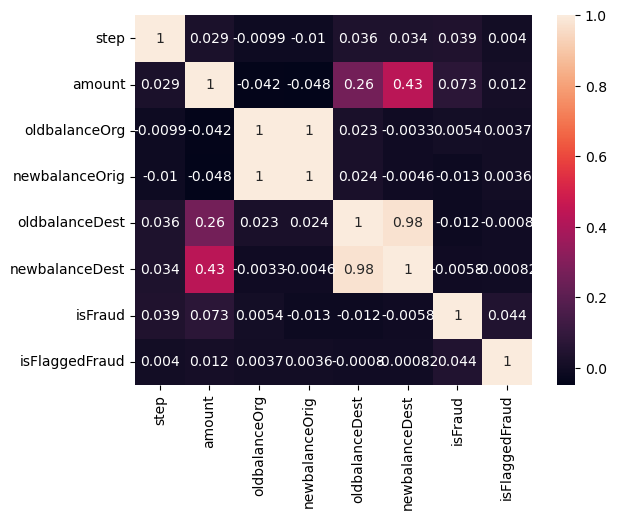

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
df.isnull().sum()


step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
Starting_Letter    0
dtype: int64

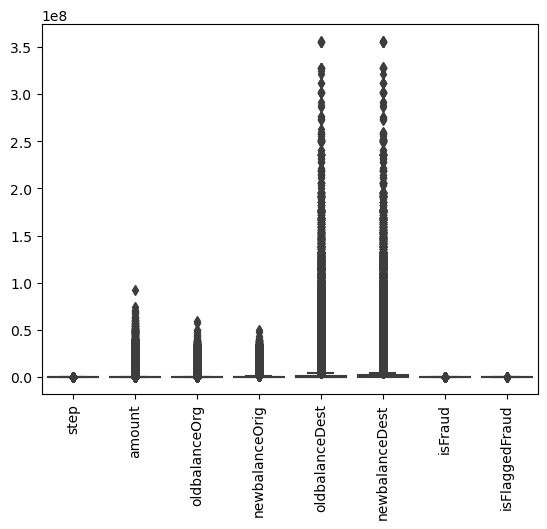

In [22]:
#Now we will Dectect Outliers
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()
#Here we can see Columns Amount, oldbalanceOrg , newbalanceOrig, oldbalanceDest , newbalanceDest are having outliers

In [23]:
#Now we will deal with the Outliers  
def outlier_detection(df,colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [24]:
outlier_detection(df,'amount')

(-227513.61500000005, 582084.185)

In [25]:
outlier_detection(df,'oldbalanceOrg')

(-286691.73, 477819.55)

In [26]:
outlier_detection(df,'newbalanceOrig')

(-427431.615, 712386.0249999999)

In [27]:
outlier_detection(df,'oldbalanceDest')

(-2190278.695, 4022888.6249999995)

In [28]:
outlier_detection(df,'newbalanceDest')

(-2312173.8200000003, 4444869.94)

In [29]:
df.loc[df['amount']>582084,'amount'] = 582084

In [30]:
df.loc[df['oldbalanceOrg']>477819,'oldbalanceOrg'] = 477819

In [31]:
df.loc[df['newbalanceOrig']>712386,'newbalanceOrig'] = 712386

In [32]:
df.loc[df['oldbalanceDest']>4022888,'oldbalanceDest'] = 4022888

In [33]:
df.loc[df['newbalanceDest']>4444869,'newbalanceDest'] = 4444869

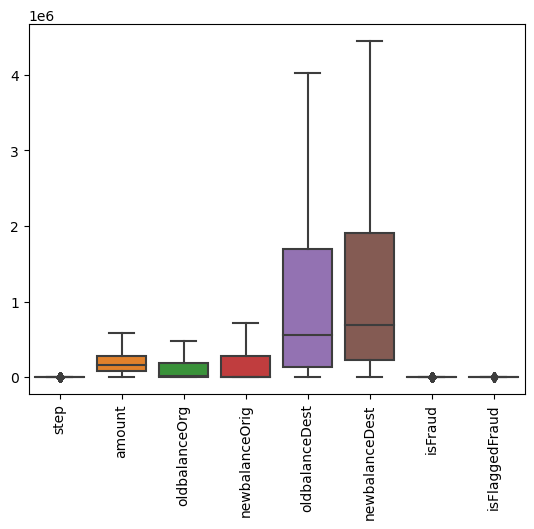

In [34]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()
#here we can see can dealed with all the Outliers

In [35]:
df.duplicated().sum()


0

In [36]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.007577,-0.000751,-0.000332,0.011933,0.003738,0.039035,0.004041
amount,-0.007577,1.000000,-0.096846,-0.095039,0.160888,0.269097,0.046157,0.004359
oldbalanceOrg,-0.000751,-0.096846,1.000000,0.920189,0.052377,-0.028555,0.044118,0.003538
newbalanceOrig,-0.000332,-0.095039,0.920189,1.000000,0.049813,-0.058093,-0.026136,0.003462
oldbalanceDest,0.011933,0.160888,0.052377,0.049813,1.000000,0.968177,-0.026231,-0.001679
newbalanceDest,0.003738,0.269097,-0.028555,-0.058093,0.968177,1.000000,-0.013475,-0.001768
isFraud,0.039035,0.046157,0.044118,-0.026136,-0.026231,-0.013475,1.000000,0.044095
isFlaggedFraud,0.004041,0.004359,0.003538,0.003462,-0.001679,-0.001768,0.044095,1.000000


<Axes: >

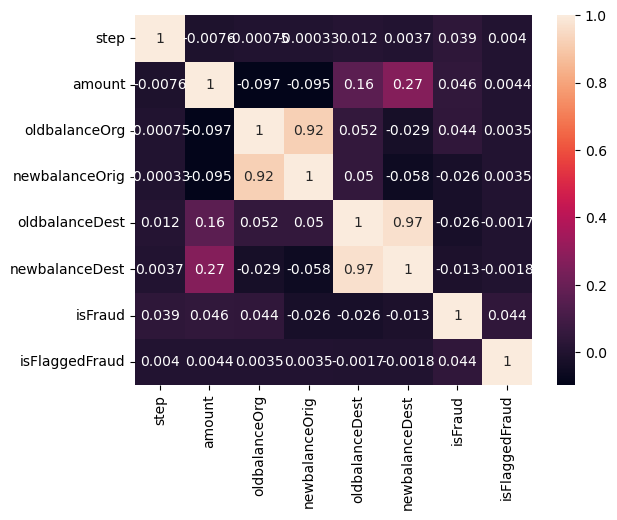

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211125 entries, 0 to 4211124
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             object 
 2   amount           float64
 3   nameOrig         object 
 4   oldbalanceOrg    float64
 5   newbalanceOrig   float64
 6   nameDest         object 
 7   oldbalanceDest   float64
 8   newbalanceDest   float64
 9   isFraud          int64  
 10  isFlaggedFraud   int64  
 11  Starting_Letter  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 385.5+ MB


In [39]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Starting_Letter
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,C
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,C
2,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0,C
3,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0,C
4,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0,C


In [40]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object)

In [41]:
df = pd.get_dummies(df,columns=['type'])

In [42]:
data = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','isFlaggedFraud','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_TRANSFER','isFraud']] 

In [43]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER,isFraud
0,1,181.00,181.00,0.00,0.00,0,0,0,0,1,1
1,1,181.00,181.00,0.00,21182.00,0,0,1,0,0,1
2,1,5337.77,41720.00,36382.23,41898.00,0,0,0,1,0,0
3,1,9644.94,4465.00,0.00,10845.00,0,0,0,1,0,0
4,1,229133.94,15325.00,0.00,5083.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4211120,743,339682.13,339682.13,0.00,0.00,0,0,1,0,0,1
4211121,743,582084.00,477819.00,0.00,0.00,0,0,0,0,1,1
4211122,743,582084.00,477819.00,0.00,68488.84,0,0,1,0,0,1
4211123,743,582084.00,477819.00,0.00,0.00,0,0,0,0,1,1


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = data.iloc[:,0:10]

In [46]:
y = data['isFraud']

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.75,random_state=1)

In [48]:
xtrain

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER
1452282,185,286838.86,9078.00,295916.86,122953.24,0,1,0,0,0
3091882,330,435323.24,23333.73,0.00,4022888.00,0,0,1,0,0
150172,14,413972.15,50619.00,0.00,68366.38,0,0,1,0,0
1272339,165,172964.65,200795.00,373759.65,311698.29,0,1,0,0,0
1435440,184,118687.94,0.00,0.00,3825794.39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413825,34,67513.71,0.00,0.00,1088264.52,0,0,1,0,0
2326672,259,264877.86,174890.86,439768.72,4022888.00,0,1,0,0,0
1166159,161,109492.86,477819.00,712386.00,4022888.00,0,1,0,0,0
491263,38,31146.23,63240.80,94387.03,4022888.00,0,1,0,0,0


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lg = LogisticRegression()

In [51]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [52]:
xtest

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER
3310237,352,474227.94,0.0,0.00,1028282.12,0,0,0,0,1
1820834,212,61688.21,0.0,0.00,1141087.38,0,0,1,0,0
4193426,691,312609.83,19113.0,331722.83,53291.67,0,1,0,0,0
3456317,370,57937.39,0.0,0.00,64383.42,0,0,1,0,0
1386918,182,127251.54,0.0,0.00,581453.01,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1198178,162,75430.71,99996.0,24565.29,0.00,0,0,0,0,1
3764997,397,528690.95,51582.0,0.00,108191.42,0,0,1,0,0
4001549,490,215826.31,13056.0,0.00,3320464.13,0,0,1,0,0
117939,13,212180.05,477819.0,712386.00,944336.68,0,1,0,0,0


In [53]:
y_pred = lg.predict(xtest) 

In [54]:
len(xtest)

3158344

In [55]:
len(y_pred)

3158344

In [56]:
print('ytest',ytest[:25].values)
print('y_pred',y_pred[:25])

ytest [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3152183
           1       0.18      0.13      0.15      6161

    accuracy                           1.00   3158344
   macro avg       0.59      0.56      0.58   3158344
weighted avg       1.00      1.00      1.00   3158344



In [59]:
print(confusion_matrix,classification_report(ytest,y_pred))

<function confusion_matrix at 0x00000204A7D77D80>               precision    recall  f1-score   support

           0       1.00      1.00      1.00   3152183
           1       0.18      0.13      0.15      6161

    accuracy                           1.00   3158344
   macro avg       0.59      0.56      0.58   3158344
weighted avg       1.00      1.00      1.00   3158344



In [60]:
confusion_matrix(ytest,y_pred)

array([[3148576,    3607],
       [   5355,     806]], dtype=int64)

<Axes: >

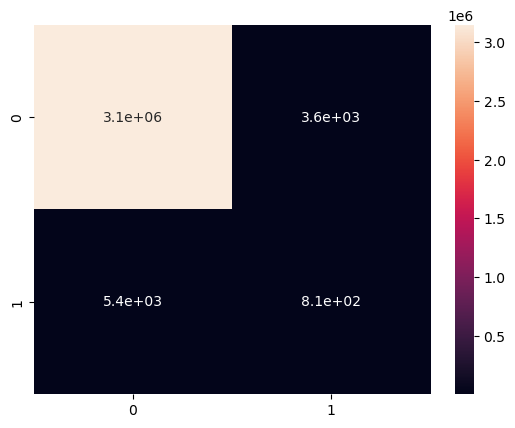

In [61]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True)

In [62]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER,isFraud
0,1,181.00,181.00,0.00,0.00,0,0,0,0,1,1
1,1,181.00,181.00,0.00,21182.00,0,0,1,0,0,1
2,1,5337.77,41720.00,36382.23,41898.00,0,0,0,1,0,0
3,1,9644.94,4465.00,0.00,10845.00,0,0,0,1,0,0
4,1,229133.94,15325.00,0.00,5083.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4211120,743,339682.13,339682.13,0.00,0.00,0,0,1,0,0,1
4211121,743,582084.00,477819.00,0.00,0.00,0,0,0,0,1,1
4211122,743,582084.00,477819.00,0.00,68488.84,0,0,1,0,0,1
4211123,743,582084.00,477819.00,0.00,0.00,0,0,0,0,1,1


In [63]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif=pd.DataFrame()

In [66]:
vif

""


In [67]:
vif['Features'] = data.columns

In [68]:
vif

,Features
0,step
1,amount
2,oldbalanceOrg
3,newbalanceOrig
4,oldbalanceDest
5,isFlaggedFraud
6,type_CASH_IN
7,type_CASH_OUT
8,type_DEBIT
9,type_TRANSFER


In [69]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [70]:
vif
#here we can see multi_collinearity  

,Features,VIF
0,step,1.002344
1,amount,1.368246
2,oldbalanceOrg,9.213076
3,newbalanceOrig,16.920693
4,oldbalanceDest,1.042194
5,isFlaggedFraud,1.002186
6,type_CASH_IN,6.916098
7,type_CASH_OUT,3.806005
8,type_DEBIT,1.037296
9,type_TRANSFER,2.652457


In [71]:
Final_data = data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','isFlaggedFraud','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_TRANSFER','isFraud']] 

In [72]:
len(data['isFraud']) #row are more because we removed merchants accounts

4211125

In [73]:
len(y_pred)

3158344

In [74]:
len(xtest)

3158344

In [75]:
xtest['Final Fraud Predicton'] = y_pred

In [85]:
xtest[xtest['Final Fraud Predicton']==1]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER,Final Fraud Predicton
1472407,186,396509.05,405458.00,8948.95,390076.44,0,0,1,0,0,1
503022,38,191643.63,189178.00,0.00,0.00,0,0,1,0,0,1
336227,20,213826.24,239870.00,26043.76,8490.49,0,0,1,0,0,1
560793,41,178569.52,156419.00,0.00,0.00,0,0,1,0,0,1
417342,34,94592.83,99091.00,4498.17,66394.19,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
467940,37,160049.36,156685.00,0.00,0.00,0,0,0,0,1,1
699764,117,466359.63,466359.63,0.00,0.00,0,0,0,0,1,1
452006,36,578141.66,477819.00,0.00,12348.58,0,0,1,0,0,1
572457,41,307972.03,315844.00,7871.97,0.00,0,0,1,0,0,1


In [81]:
xtest['Final Fraud Predicton'].value_counts()

0    3153931
1       4413
Name: Final Fraud Predicton, dtype: int64

In [ ]:
#here we can see the prediction for data where the namedesk column having rows where Starting Letter is 'M'.